# Part 1: Introduction

## Introduction to BERTopic and Dimensionality Reduction

### Overview  
BERTopic is a topic modeling technique that leverages transformer-based embeddings and clustering algorithms to extract meaningful topics from text data.  
One challenge in topic modeling is the high dimensionality of embeddings. To make visualization and interpretation easier, dimensionality reduction techniques are applied.

### Why Dimensionality Reduction?  
High-dimensional data is difficult to interpret and visualize. By reducing the dimensions while preserving structure, we can:
- Improve computational efficiency.  
- Enhance clustering performance.  
- Enable better visualization of topics.

### Techniques Covered  
In this notebook, we will focus on three popular dimensionality reduction techniques:
- **PCA (Principal Component Analysis):** A linear method that projects data onto principal components.  
- **t-SNE (t-Distributed Stochastic Neighbor Embedding):** A nonlinear method that preserves local relationships in data for visualization.  
- **UMAP (Uniform Manifold Approximation and Projection):** A nonlinear technique that balances local and global structure preservation, well-suited for embedding visualization.


#Part 2: Load and Explore Data
Here, we load the dataset (honey_scam_500.xlsx) from Google Drive into a pandas DataFrame, perform basic exploration of the data, and clean the dataset by removing any missing values.

## Installations

In [1]:
%pip install pandas numpy bertopic umap-learn
%pip install --force-reinstall --no-cache-dir gensim

  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/726.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 726.2/726.2 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 3.4 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 3.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 3.0 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 3.0 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -----------------------------

In [18]:
%pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Imports

In [5]:
import pandas as pd
from bertopic import BERTopic
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load Data

In [7]:
# Mount Google Drive

# Load the dataset
file_path = '../data/youtube_comments/honey_scam_500.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
display(df.head())
display(df.info())

## Data Overview
# The dataset contains media comments with the following columns:
# - **text:** The content of the comment.
# - **author:** The user who posted the comment.
# - **likes:** Number of likes the comment received.
# - **replyCount:** Number of replies to the comment.

## Basic Data Cleaning
# Let's remove missing values if any.
df = df.dropna()

# Show updated dataset information
display(df.info())

,text,author,likes,replyCount
0,"If you guys enjoyed this video, please conside...",@MegaLag,23905,539
1,Cannot trust those guys on the thumbnail?,@logic8673,0,0
2,I like that the influencers got f***ed to when...,@PeterJung-cx1ib,0,0
3,This is straight up evil. I knew Paypal is no...,@filsc,0,0
4,Its not their fault tho they didnt know,@TeumuTemara,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        500 non-null    object
 1   author      500 non-null    object
 2   likes       500 non-null    int64 
 3   replyCount  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        500 non-null    object
 1   author      500 non-null    object
 2   likes       500 non-null    int64 
 3   replyCount  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


None

In [8]:
texts = df['text'].astype(str).tolist()

#Part 3: BERTopic Overview
We introduce BERTopic in this section, explaining how it uses transformer-based embeddings and clustering techniques to identify topics from text data. We also prepare the dataset by extracting the text column for modeling.

In [9]:
bertopic_model = BERTopic()

#Part 4: Topic Modeling with BERTopic
In this section, we apply BERTopic to extract topics from the dataset and explore the various topic visualization tools it offers, such as visualizations of topic clusters, term importance, and topic distributions.

In [10]:
### Part 4: Topic Modeling with BERTopic

# Train BERTopic on the dataset
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Define a custom CountVectorizer to remove generic stopwords and improve topic quality
vectorizer_model = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# Initialize BERTopic with HDBSCAN parameters to refine topic formation
bertopic_model = BERTopic(vectorizer_model=vectorizer_model, min_topic_size=10, verbose=True)

# Fit the model on the dataset
topics, probs = bertopic_model.fit_transform(texts)

# Display the top topics
display(bertopic_model.get_topic_info())

## Visualizing the Topics
# BERTopic provides several built-in visualization tools:

# 1. Visualize topic clusters
bertopic_model.visualize_topics()

# 2. Visualize term importance per topic
bertopic_model.visualize_barchart(top_n_topics=10)  # Limit to top 10 topics for clarity

# 3. Visualize the distribution of topics over documents
bertopic_model.visualize_distribution(probs)

## Handling Topic Outliers (-1)
# If too many documents fall into topic -1, we may need to adjust parameters
outlier_percentage = (len([t for t in topics if t == -1]) / len(topics)) * 100
print(f"Outlier Topic (-1) Percentage: {outlier_percentage:.2f}%")

# If outlier percentage is too high, adjust HDBSCAN parameters accordingly
if outlier_percentage > 20:
    print("Too many outliers detected! Consider tuning 'min_topic_size' or 'cluster_selection_epsilon'.")

2025-04-03 07:11:12,154 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 07:11:23,156 - BERTopic - Embedding - Completed ✓
2025-04-03 07:11:23,156 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 07:11:30,901 - BERTopic - Dimensionality - Completed ✓
2025-04-03 07:11:30,901 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 07:11:30,919 - BERTopic - Cluster - Completed ✓
2025-04-03 07:11:30,919 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 07:11:30,951 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,120,-1_video_money_think_lmg,"[video, money, think, lmg, honey, doing, scam,...","[Yo, seeing jimmy’s friend as a guy feel awkwa..."
1,0,82,0_honey_free_using_time,"[honey, free, using, time, just, like, im, mon...",[I stopped using honey some time ago. I didn't...
2,1,67,1_scam_youtubers_honey_big,"[scam, youtubers, honey, big, affiliate, make,...",[impressive work. i assumed that their profits...
3,2,55,2_work_wow_good_damn,"[work, wow, good, damn, good job, gained, half...",[Excellent... I liked your video 9 times ...👍👍...
4,3,53,3_weeks_release_wait_wheres,"[weeks, release, wait, wheres, drop, waiting, ...","[hey new sub here , I was wondering when will ..."
5,4,21,4_paypal_owned_people_evil,"[paypal, owned, people, evil, good, stolen, ow...",[why are the big influencers not suing paypal ...
6,5,21,5_influencers_things_dont_scamming,"[influencers, things, dont, scamming, heavily,...",[Most things on internet couldn’t happen in re...
7,6,19,6_markiplier_right_markiplier markiplier_predi...,"[markiplier, right, markiplier markiplier, pre...",[You didn't mention Markiplier! Markiplier pre...
8,7,15,7_linus_beast_mr beast_mr,"[linus, beast, mr beast, mr, poor, mentioned, ...",[oh thank the lord i figured it was fulla chyt...
9,8,14,8_megalag_alive_lag_guy,"[megalag, alive, lag, guy, video, need watch, ...",[Megalag we're worried--is pt. 2 of the video ...


Outlier Topic (-1) Percentage: 24.00%
Too many outliers detected! Consider tuning 'min_topic_size' or 'cluster_selection_epsilon'.




> The topics given above represent the "raw" form of clusters, generated by Berttopic with default settings- using UMAP as a reducer.

> The topic thats starts with -1 represents the outliers topic



#Part 5: Dimensionality Reduction for Visualization
In this section, we focus on reducing the dimensionality of the topic embeddings using PCA and t-SNE. We experiment with different parameter combinations to observe how they affect the visualization of the topic space.

##Preperations

In [11]:
# Ensure embeddings exist
embeddings = bertopic_model.topic_embeddings_
if embeddings is None:
    raise ValueError("BERTopic model does not have topic embeddings. Ensure you are using a model that supports topic representations.")

##PCA

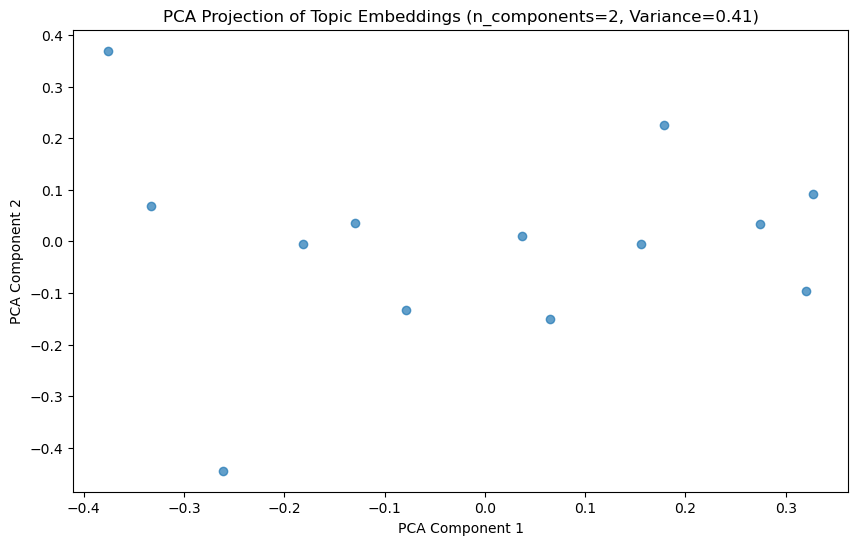

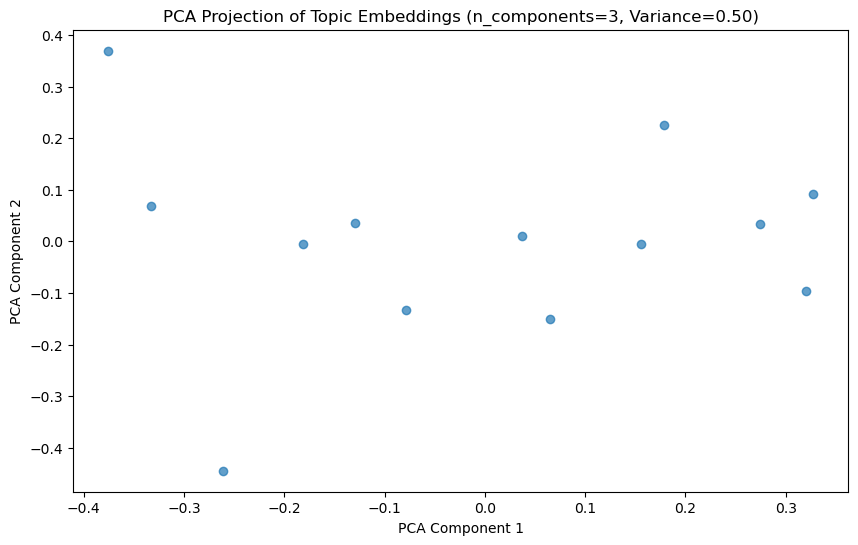

In [12]:
## PCA for Dimensionality Reduction
# Experimenting with different numbers of components and variance retention
pca_variants = [2, 3]
for n_comp in pca_variants:
    pca = PCA(n_components=n_comp)
    pca_embeddings = pca.fit_transform(embeddings)
    explained_var = sum(pca.explained_variance_ratio_)

    # Plot PCA results
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], alpha=0.7)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(f"PCA Projection of Topic Embeddings (n_components={n_comp}, Variance={explained_var:.2f})")
    plt.show()

##t-SNE

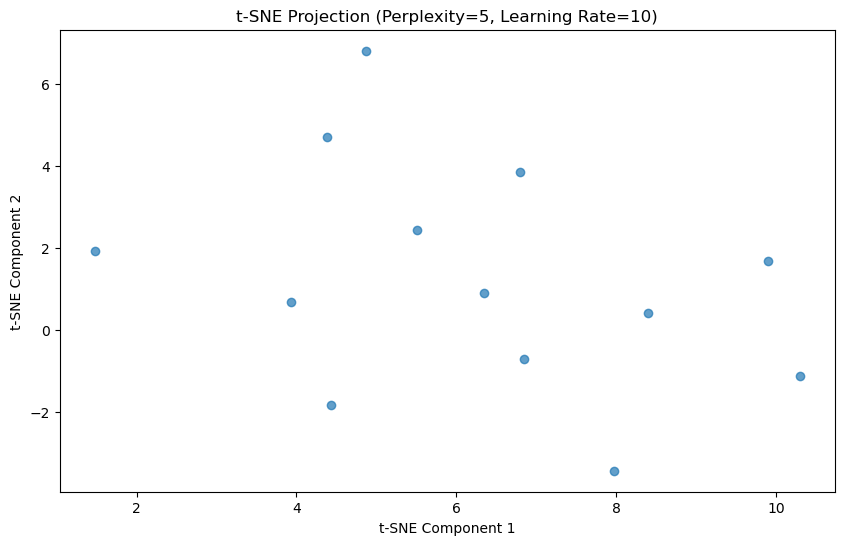

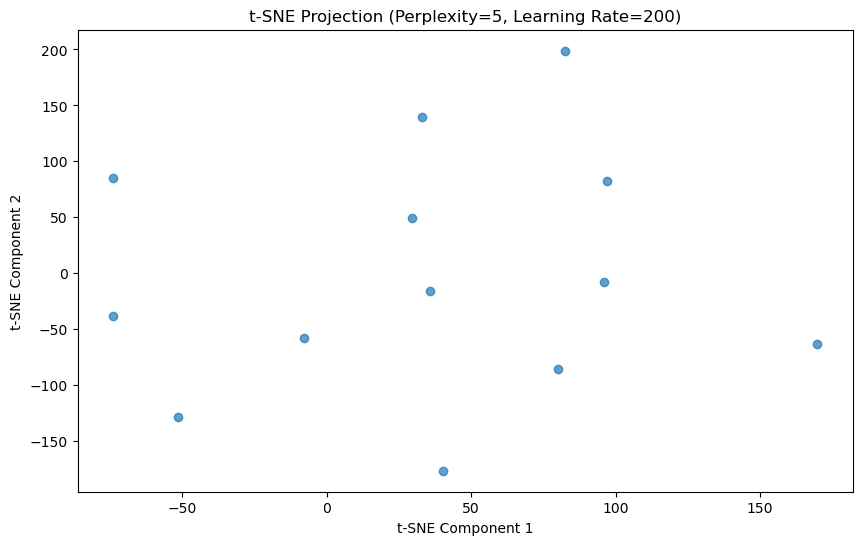

Skipping perplexity=30 as it is >= number of samples (13)
Skipping perplexity=50 as it is >= number of samples (13)


In [13]:
## t-SNE for Nonlinear Dimensionality Reduction
perplexity_values = [5, 30, 50]
learning_rates = [10, 200]
n_samples = embeddings.shape[0]

for perp in perplexity_values:
    if perp >= n_samples:
        print(f"Skipping perplexity={perp} as it is >= number of samples ({n_samples})")
        continue
    for lr in learning_rates:
        tsne = TSNE(n_components=2, perplexity=perp, learning_rate=lr, random_state=42)
        tsne_embeddings = tsne.fit_transform(embeddings)

        # Plot t-SNE results
        plt.figure(figsize=(10, 6))
        plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.7)
        plt.xlabel("t-SNE Component 1")
        plt.ylabel("t-SNE Component 2")
        plt.title(f"t-SNE Projection (Perplexity={perp}, Learning Rate={lr})")
        plt.show()

# Part 6: Comparative Analysis of PCA vs. t-SNE
In this section, we compare PCA and t-SNE based on how well they separate and visualize topic clusters. We evaluate clustering performance using silhouette scores and visualize the resulting clusters for both methods.

##Explained variance plot for PCA.

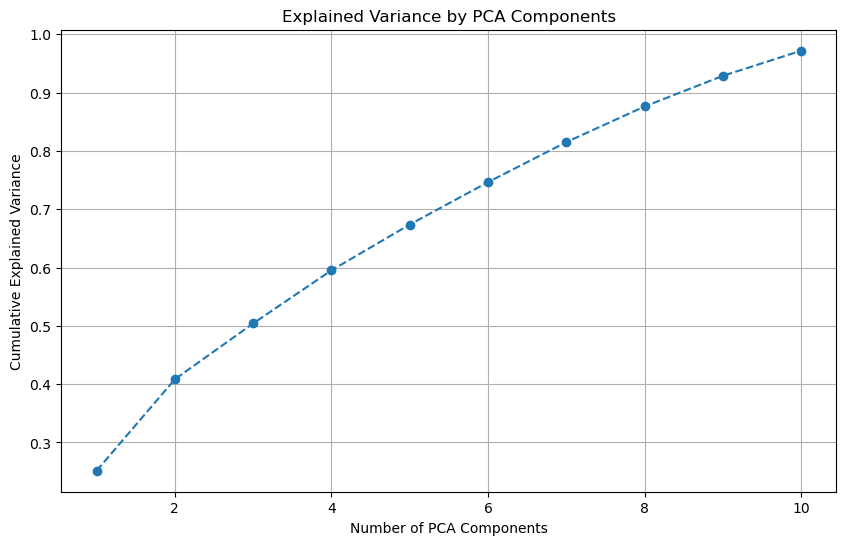

In [14]:
# Compute explained variance for PCA
pca = PCA(n_components=10)
pca.fit(embeddings)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

##Clustering separability using K-Means and silhouette scores.

In [15]:
## Comparing Clustering Separability
# We will use k-means clustering to evaluate how well PCA and t-SNE separate topic clusters.

# KMeans clustering on PCA embeddings
pca_kmeans = KMeans(n_clusters=10, random_state=42).fit(pca_embeddings)
pca_silhouette = silhouette_score(pca_embeddings, pca_kmeans.labels_)

# KMeans clustering on t-SNE embeddings
tsne_kmeans = KMeans(n_clusters=10, random_state=42).fit(tsne_embeddings)
tsne_silhouette = silhouette_score(tsne_embeddings, tsne_kmeans.labels_)

# Compare silhouette scores
print(f"Silhouette Score for PCA: {pca_silhouette:.3f}")
print(f"Silhouette Score for t-SNE: {tsne_silhouette:.3f}")

Silhouette Score for PCA: 0.058
Silhouette Score for t-SNE: 0.018


## Visualization of Clusters

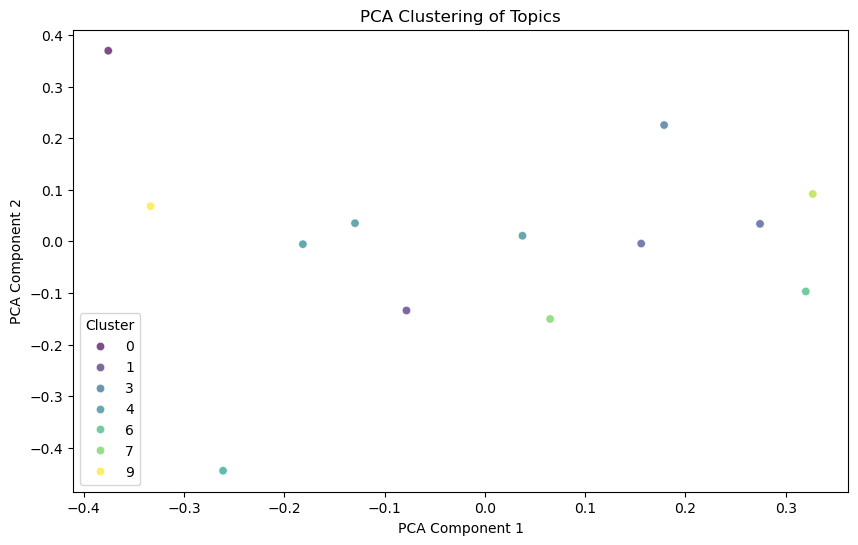

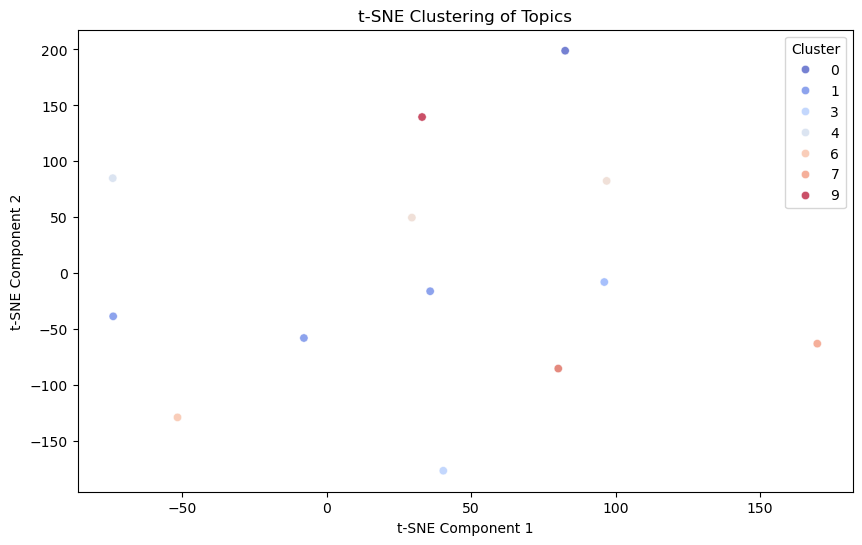

In [16]:
# Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_embeddings[:, 0], y=pca_embeddings[:, 1], hue=pca_kmeans.labels_, palette="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Clustering of Topics")
plt.legend(title="Cluster")
plt.show()

# Plot t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_embeddings[:, 0], y=tsne_embeddings[:, 1], hue=tsne_kmeans.labels_, palette="coolwarm", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of Topics")
plt.legend(title="Cluster")
plt.show()

## Conclusion
# - PCA preserves global structure and explains variance well but may not separate clusters as effectively.
# - t-SNE captures local structures better and tends to form more distinct clusters.
# - Silhouette scores indicate which method provides better-defined topic clusters.

#Part 7: Using the reducer in bertopic
In order to find the best dimention reducer, we want to plug the reducer into a given bertopic "assummption configuration". This configuration uses the default `HDBSCAN` for the clustering model, and the `CountVectorizer` as the vectorizing model.

### Model Assumptions

In [19]:
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Download stop words if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def custom_preprocessor(text):
    # Lowercase
    text = text.lower()

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

TSNE.transform = TSNE.fit_transform
vectorizer_model = CountVectorizer(stop_words='english', ngram_range=(1, 2), preprocessor=custom_preprocessor)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HamamaHome\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Testing Coherence and diversity

### **Topic Coherence**

**Definition**: Measures the **semantic similarity** between high-probability words in a topic.

**Why it matters**: A coherent topic has top words that make sense together—e.g., a topic like `["apple", "banana", "fruit", "mango", "grape"]` is more coherent than `["apple", "engine", "mango", "car", "grape"]`.

**Popular metric variants**:
- **NPMI (Normalized Pointwise Mutual Information)** – used in the BERTopic paper; good for evaluating neural models.
- **C_V** – combines cosine similarity with sliding windows; works well for human-aligned scores.
- **U_Mass** – based on document co-occurrence; favors traditional LDA-style models.

The Traditional BERTopic was tested using the `NPMI` metric variant, but it tends to work poorly with short texts, low vocabulary overlap and few documents. This is why we use the `c`

**Range**: Typically from -1 to 1. Higher is better.

---

In [20]:
def bertopic_coherence(model: BERTopic, documents: list[str], coherence: str = "c_v", top_n_words: int = 10) -> float:
    from gensim.corpora.dictionary import Dictionary
    from gensim.models.coherencemodel import CoherenceModel
    from sklearn.feature_extraction.text import CountVectorizer


    # Step 1: Extract valid topic word lists
    topic_words = []
    for topic_id in range(len(model.get_topics())):
        words = model.get_topic(topic_id)
        if words:  # Ensure non-empty topic
            topic_words.append([word for word, _ in words[:top_n_words]])

    if not topic_words:
        raise ValueError("No valid topics found in the BERTopic model.")

    # Step 2: Vectorizer vocabulary for filtering
    vectorizer = CountVectorizer(stop_words='english')
    vectorizer.fit(documents)
    vocab = set(vectorizer.get_feature_names_out())

    # Step 3: Tokenize documents with vocabulary filtering
    tokenized_docs = [
        [word for word in doc.lower().split() if word in vocab]
        for doc in documents
    ]

    if not any(tokenized_docs):
        raise ValueError("Tokenized documents are empty after preprocessing.")

    # Step 4: Create dictionary and compute coherence
    dictionary = Dictionary(tokenized_docs)
    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence=coherence
    )

    return coherence_model.get_coherence()



### **Topic Diversity**

**Definition**: Measures how **distinct** the topics are from each other by looking at the **overlap of their top words**.

**Formula** (used in BERTopic paper):
\[
\text{Diversity} = \frac{\text{Number of unique words across topics}}{\text{Total words (Top-N words × Number of topics)}}
\]

**Why it matters**: You want each topic to represent something unique. If every topic includes the same top words, your model lacks diversity.

**Range**: 0 to 1. Higher is better.

---

Together:
- **High coherence** = easy to interpret topics.
- **High diversity** = minimal redundancy across topics.

Want to compute both for your BERTopic model in code?

In [21]:
def bertopic_diversity(model, top_n_words=10):
    topics = model.get_topics()
    topic_words = set()
    total_words = 0

    for topic_id in range(len(topics)):
        words = model.get_topic(topic_id)
        if words:
            top_words = [word for word, _ in words[:top_n_words]]
            topic_words.update(top_words)
            total_words += len(top_words)

    if total_words == 0:
        return 0.0

    diversity_score = len(topic_words) / total_words
    return diversity_score

In [22]:
bertopic = BERTopic()
topics, probs = bertopic.fit_transform(texts)

### Silhouette Score
The **silhouette score** is a metric used to evaluate the quality of **unsupervised clustering**, including the kind of clustering BERTopic does.

#### Definition
The silhouette score measures how similar a data point is to its **own cluster** compared to **other clusters**.

#### Formula (for a single sample)
\[
s = \frac{b - a}{\max(a, b)}
\]
- `a`: Mean intra-cluster distance (average distance to other points in the same cluster).
- `b`: Mean nearest-cluster distance (average distance to points in the nearest cluster).
- `s` ranges from **-1 to 1**:
  - **+1**: Well matched to its own cluster, and poorly matched to others.
  - **0**: On or very close to the decision boundary between clusters.
  - **-1**: Possibly assigned to the wrong cluster.

#### Use Case
Great for evaluating how "tight" and "well-separated" your clusters are—especially in **embedding-based** models like BERTopic where traditional likelihood-based metrics don’t apply.


In [23]:
def bertopic_silhouette(model, texts):
    """
    Calculates the silhouette score for a given BERTopic model and texts.

    Args:
        model: The BERTopic model.
        texts: A list of texts.

    Returns:
        The silhouette score.
    """
    # Get the topic embeddings
    embeddings = model.topic_embeddings_
    if embeddings is None:
        raise ValueError("BERTopic model does not have topic embeddings.")

    # Get the topic assignments
    topics, probs = model.transform(texts)

    # Remove outlier topics (-1)
    valid_indices = [i for i, topic in enumerate(topics) if topic != -1]

    # Check if valid_indices is empty
    if not valid_indices:
        print("No valid topics found for silhouette score calculation.")
        return None

    # Ensure valid_indices are within the bounds of embeddings
    valid_indices = [i for i in valid_indices if i < embeddings.shape[0]]

    valid_embeddings = embeddings[valid_indices]
    valid_topics = [topics[i] for i in valid_indices]

    # Check if enough points for silhouette score calculation
    if len(set(valid_topics)) < 2:
        print("Not enough clusters for silhouette score calculation.")
        return None

    # Calculate silhouette score
    try:
        score = silhouette_score(valid_embeddings, valid_topics)
        return score
    except ValueError:
        print("Silhouette score calculation failed. Check data or parameters.")
        return None

The assumption configuration also includes the KMeans clutering model, which will make sure that the data will always be split into a constant number of clusters. This is done in order for us to be able to calculate silhouette scores even when the dim-red performs poorly. for example `PCA-10` configuration could split the data into 2 clusters

In [24]:
shared_configuration = {
    "vectorizer_model": CountVectorizer(stop_words='english', ngram_range=(1, 2), preprocessor=custom_preprocessor),
    "embedding_model": SentenceTransformer("all-MiniLM-L6-v2"),
    "verbose": False,
    "min_topic_size": 10,
    "hdbscan_model": KMeans(n_clusters=10, random_state=42)
}

In [25]:
bertopic_silhouette(bertopic, texts)

-0.15497148

### Finding bertopic baseline scores
In order to optimize the bertopic dimentionallity reduction module, we need to compare between the baseline scores of bertopic, which uses `UMAP(n_components=5,n_neighbors=15,min_dist=0.0,metric="cosine",low_memory=self.low_memory)` by default

In [26]:
diversity_score = bertopic_diversity(bertopic)
coherece_score = bertopic_coherence(bertopic, texts, 'c_v')
diversity_score, coherece_score

(0.7307692307692307, 0.49061280530014917)

In [27]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from bertopic.dimensionality import BaseDimensionalityReduction
from bertopic import BERTopic

TSNE.transform = TSNE.fit_transform

topic_models = {}


topic_models['EMPTY'] = BERTopic(**shared_configuration, umap_model= BaseDimensionalityReduction())

# PCA variations
topic_models["PCA_5"] = BERTopic(**shared_configuration, umap_model=PCA(n_components=5))
topic_models["PCA_10"] = BERTopic(**shared_configuration, umap_model=PCA(n_components=10))
topic_models["PCA_25"] = BERTopic(**shared_configuration, umap_model=PCA(n_components=25))

# TSNE variations
topic_models["TSNE_10"] = BERTopic(**shared_configuration, umap_model=TSNE(n_components=2, perplexity=10, random_state=42))
topic_models["TSNE_30"] = BERTopic(**shared_configuration, umap_model=TSNE(n_components=2, perplexity=30, random_state=42))
topic_models["TSNE_50"] = BERTopic(**shared_configuration, umap_model=TSNE(n_components=2, perplexity=50, random_state=42))

# UMAP variations
topic_models["UMAP_5"] = BERTopic(**shared_configuration, umap_model=UMAP(n_components=5, random_state=42))
topic_models["UMAP_10"] = BERTopic(**shared_configuration, umap_model=UMAP(n_components=10, random_state=42))
topic_models["UMAP_25"] = BERTopic(**shared_configuration, umap_model=UMAP(n_components=25, random_state=42))

### Fit models

In [28]:
import pandas as pd

# Assuming you have already run the code and have the topic_models dictionary and texts list

results = []
for model_name, model in topic_models.items():
    try:
        model.fit_transform(texts)
        diversity = bertopic_diversity(model)
        coherence = bertopic_coherence(model, texts, 'c_v')
        silhouette = bertopic_silhouette(model, texts)
        results.append([model_name, diversity, coherence, silhouette])
    except Exception as e:
        print(f"Error processing {model_name}: {e}")
        results.append([model_name, None, None])  # Store None for errors


df_comparison = pd.DataFrame(results, columns=["Model", "Diversity", "Coherence", "silhouette"])
df_comparison


,Model,Diversity,Coherence,silhouette
0,EMPTY,0.84,0.430472,-0.092009
1,PCA_5,0.80,0.393643,-0.094310
2,PCA_10,0.85,0.447027,-0.155158
3,PCA_25,0.84,0.431764,-0.183982
4,TSNE_10,0.82,0.399172,-0.046586
5,TSNE_30,0.87,0.423494,-0.119478
6,TSNE_50,0.83,0.381971,-0.050038
7,UMAP_5,0.84,0.387123,-0.197707
8,UMAP_10,0.87,0.395729,-0.106221
9,UMAP_25,0.85,0.376967,-0.013338


In [29]:
import plotly.express as px
from umap import UMAP

plot_data = []
projection_model = UMAP(n_neighbors=15, min_dist=0.0, n_components=2, metric="cosine")
projection = projection_model.fit_transform(embeddings)

for model_name, model in topic_models.items():
    try:
        topics, _ = model.transform(texts)

        if len(set(topics)) <= 1:
            print(f"Skipping {model_name}: only one topic detected.")
            continue

        for i, (x, y) in enumerate(projection):
            plot_data.append({
                "x": projection[:, 0],
                "y": projection[:, 1],
                "Text": texts[i],
                "Topic": f"Topic {topics[i]}",
                "Model": model_name
            })

    except Exception as e:
        print(f"Error in {model_name} visualization: {e}")

Error in EMPTY visualization: X has 384 features, but KMeans is expecting 25 features as input.
Error in PCA_5 visualization: X has 5 features, but KMeans is expecting 25 features as input.
Error in PCA_10 visualization: X has 10 features, but KMeans is expecting 25 features as input.
Skipping PCA_25: only one topic detected.
Error in TSNE_10 visualization: X has 2 features, but KMeans is expecting 25 features as input.
Error in TSNE_30 visualization: X has 2 features, but KMeans is expecting 25 features as input.
Error in TSNE_50 visualization: X has 2 features, but KMeans is expecting 25 features as input.
Error in UMAP_5 visualization: X has 5 features, but KMeans is expecting 25 features as input.
Error in UMAP_10 visualization: X has 10 features, but KMeans is expecting 25 features as input.


In [30]:
df_plot = pd.DataFrame(plot_data)

if not df_plot.empty:
    fig = px.scatter(
        df_plot,
        x="x", y="y", color="Topic",
        facet_col="Model", facet_col_wrap=3,
        hover_data=["Text"],
        title="BERTopic Document Clustering Across Dimensionality Reducers",
        opacity=0.85,
        height=800
    )
    fig.show()
else:
    print("No clustering data to visualize.")

In [31]:
# Visualization: collect document-topic assignments
import plotly.express as px
from umap import UMAP

projection_model = UMAP(n_neighbors=15, min_dist=0.0, n_components=2, metric="cosine")
projection = projection_model.fit_transform(embeddings)
plot_data = []
for model_name, model in topic_models.items():
    try:
        topics, _ = model.transform(texts)

        if len(set(topics)) <= 1:
            print(f"Skipping {model_name}: only one topic detected.")
            continue

        for i, (x, y) in enumerate(projection):
            plot_data.append({
                "x": x,
                "y": y,
                "Text": texts[i],
                "Topic": f"Topic {topics[i]}",
                "Model": model_name
            })

    except Exception as e:
        print(f"Error in {model_name} visualization: {e}")

Error in EMPTY visualization: X has 384 features, but KMeans is expecting 25 features as input.
Error in PCA_5 visualization: X has 5 features, but KMeans is expecting 25 features as input.
Error in PCA_10 visualization: X has 10 features, but KMeans is expecting 25 features as input.
Skipping PCA_25: only one topic detected.
Error in TSNE_10 visualization: X has 2 features, but KMeans is expecting 25 features as input.
Error in TSNE_30 visualization: X has 2 features, but KMeans is expecting 25 features as input.
Error in TSNE_50 visualization: X has 2 features, but KMeans is expecting 25 features as input.
Error in UMAP_5 visualization: X has 5 features, but KMeans is expecting 25 features as input.
Error in UMAP_10 visualization: X has 10 features, but KMeans is expecting 25 features as input.


In [32]:
df_plot = pd.DataFrame(plot_data)

if not df_plot.empty:
    fig = px.scatter(
        df_plot,
        x="x", y="y", color="Topic",
        facet_col="Model", facet_col_wrap=3,
        hover_data=["Text"],
        title="BERTopic Document Clustering Across Dimensionality Reducers",
        opacity=0.85,
        height=800
    )
    fig.show()
else:
    print("No clustering data to visualize.")

## Optimizing the best dim-red
It seems that the `Umap-5` configuration tends to work  best. Umap with 5 dimensions is the recommended approach when working with BERTopic, and it is for a good reason.
In the following section, we will try to optimize the results of UMAP.

In [ ]:
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for UMAP
param_grid = {
    "n_neighbors": [10, 15, 20],
    "min_dist": [0.0, 0.1, 0.2, 0.5],
    "n_components": [5] ,
    "metric": [ "cosine","euclidean"]  #fix n_components at 5
}

# Initialize an empty dictionary to store the results
results = []

# Iterate over the parameter grid using ParameterGrid
for params in ParameterGrid(param_grid):
    try:
        # Create a UMAP model with current parameters
        umap_model = UMAP(**params, random_state=42)

        # Create and fit the BERTopic model with current UMAP config
        model = BERTopic(**shared_configuration, umap_model=umap_model)
        model.fit_transform(texts)

        # Calculate and store the evaluation metrics
        diversity = bertopic_diversity(model)
        coherence = bertopic_coherence(model, texts, 'c_v')
        silhouette = bertopic_silhouette(model, texts)
        results.append([params, diversity, coherence, silhouette])

    except Exception as e:
        print(f"Error with parameters {params}: {e}")
        results.append([params, None, None, None])

# Convert the results to a Pandas DataFrame for easier analysis
df_umap_results = pd.DataFrame(results, columns=["Parameters", "Diversity", "Coherence", "Silhouette"])
df_umap_results


In [ ]:
# 🔍 UMAP 2D projection (for consistent plotting)
umap_vis = UMAP(n_components=2, random_state=42)
projection = umap_vis.fit_transform(embeddings)

# 📦 Collect clustering data
plot_data = []

for params in ParameterGrid(param_grid):
    try:
        umap_model = UMAP(**params, random_state=42)
        model = BERTopic(**shared_configuration, umap_model=umap_model)
        model.fit(texts, embeddings)
        topics, _ = model.transform(texts, embeddings=embeddings)

        if len(set(topics)) <= 1:
            print(f"Skipping config (only 1 topic): {params}")
            continue

        config_label = f"n={params['n_neighbors']}<br>dist={params['min_dist']}<br>{params['metric']}"

        for i, (x, y) in enumerate(projection):
            plot_data.append({
                "x": x,
                "y": y,
                "Text": texts[i],
                "Topic": f"Topic {topics[i]}",
                "UMAP_Config": config_label
            })

    except Exception as e:
        print(f"Visualization error for {params}: {e}")

Visualization error for {'metric': 'cosine', 'min_dist': 0.0, 'n_components': 5, 'n_neighbors': 10}: Make sure that the embeddings are a numpy array with shape: (len(docs), vector_dim) where vector_dim is the dimensionality of the vector embeddings. 
Visualization error for {'metric': 'cosine', 'min_dist': 0.0, 'n_components': 5, 'n_neighbors': 15}: Make sure that the embeddings are a numpy array with shape: (len(docs), vector_dim) where vector_dim is the dimensionality of the vector embeddings. 
Visualization error for {'metric': 'cosine', 'min_dist': 0.0, 'n_components': 5, 'n_neighbors': 20}: Make sure that the embeddings are a numpy array with shape: (len(docs), vector_dim) where vector_dim is the dimensionality of the vector embeddings. 
Visualization error for {'metric': 'cosine', 'min_dist': 0.1, 'n_components': 5, 'n_neighbors': 10}: Make sure that the embeddings are a numpy array with shape: (len(docs), vector_dim) where vector_dim is the dimensionality of the vector embedding

In [ ]:
df_plot = pd.DataFrame(plot_data)

if not df_plot.empty:
    fig = px.scatter(
        df_plot,
        x="x", y="y", color="Topic",
        facet_col="UMAP_Config", facet_col_wrap=3,
        hover_data=["Text"],
        title="📌 BERTopic Clustering of Comments Across UMAP Configurations",
        height=1000,
        opacity=0.85
    )
    fig.show()
else:
    print("⚠️ No data available for visualization.")

experimenting with HDBScan to generate higher silhouette scores

In [ ]:
import hdbscan
hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=10,         # Adjust based on expected cluster sizes
    min_samples=5,               # Lower or equal to min_cluster_size is a good start
    metric='euclidean',          # Or try 'cosine' if your data is normalized
    cluster_selection_method='leaf',
    prediction_data=True  # 'leaf' can sometimes yield more granular clusters
)

shared_configuration['hdbscan_model'] = hdbscan_model

In [ ]:
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for UMAP
param_grid = {
    "n_neighbors": [10, 15, 20],
    "min_dist": [0.0, 0.1, 0.2, 0.5],
    "n_components": [5] ,
    "metric": [ "cosine","euclidean"]  #fix n_components at 5
}

# Initialize an empty dictionary to store the results
results = []

# Iterate over the parameter grid using ParameterGrid
for params in ParameterGrid(param_grid):
    try:
        # Create a UMAP model with current parameters
        umap_model = UMAP(**params, random_state=42)

        # Create and fit the BERTopic model with current UMAP config
        model = BERTopic(**shared_configuration, umap_model=umap_model)
        model.fit_transform(texts)

        # Calculate and store the evaluation metrics
        diversity = bertopic_diversity(model)
        coherence = bertopic_coherence(model, texts, 'c_v')
        silhouette = bertopic_silhouette(model, texts)
        results.append([params, diversity, coherence, silhouette])

    except Exception as e:
        print(f"Error with parameters {params}: {e}")
        results.append([params, None, None, None])

# Convert the results to a Pandas DataFrame for easier analysis
df_umap_results = pd.DataFrame(results, columns=["Parameters", "Diversity", "Coherence", "Silhouette"])
df_umap_results


2025-04-03 00:32:17,648 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:32:28,337 - BERTopic - Embedding - Completed ✓
2025-04-03 00:32:28,339 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:32:29,446 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:32:29,447 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:32:29,468 - BERTopic - Cluster - Completed ✓
2025-04-03 00:32:29,473 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:32:29,531 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:32:39,051 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:32:39,055 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:32:39,055 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:32:39,079 - BERTopic - Cluster - Completed ✓
2025-04-03 00:32:39,085 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:32:48,436 - BERTopic - Embedding - Completed ✓
2025-04-03 00:32:48,437 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:32:49,688 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:32:49,689 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:32:49,707 - BERTopic - Cluster - Completed ✓
2025-04-03 00:32:49,712 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:32:49,760 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:32:59,815 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:32:59,819 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:32:59,821 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:32:59,841 - BERTopic - Cluster - Completed ✓
2025-04-03 00:32:59,847 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:33:09,730 - BERTopic - Embedding - Completed ✓
2025-04-03 00:33:09,731 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:33:11,106 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:33:11,107 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:33:11,126 - BERTopic - Cluster - Completed ✓
2025-04-03 00:33:11,130 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:33:11,179 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:33:21,303 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:33:21,306 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:33:21,309 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:33:21,325 - BERTopic - Cluster - Completed ✓
2025-04-03 00:33:21,331 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:33:31,209 - BERTopic - Embedding - Completed ✓
2025-04-03 00:33:31,210 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:33:32,292 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:33:32,294 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:33:32,311 - BERTopic - Cluster - Completed ✓
2025-04-03 00:33:32,315 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:33:32,366 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:33:42,076 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:33:42,082 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:33:42,084 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:33:42,107 - BERTopic - Cluster - Completed ✓
2025-04-03 00:33:42,115 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:33:51,471 - BERTopic - Embedding - Completed ✓
2025-04-03 00:33:51,472 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:33:52,719 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:33:52,721 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:33:52,739 - BERTopic - Cluster - Completed ✓
2025-04-03 00:33:52,743 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:33:52,789 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:34:03,825 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:34:03,828 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:34:03,830 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:34:03,848 - BERTopic - Cluster - Completed ✓
2025-04-03 00:34:03,854 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:34:13,683 - BERTopic - Embedding - Completed ✓
2025-04-03 00:34:13,685 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:34:15,046 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:34:15,047 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:34:15,073 - BERTopic - Cluster - Completed ✓
2025-04-03 00:34:15,081 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:34:15,125 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:34:25,179 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:34:25,186 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:34:25,188 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:34:25,203 - BERTopic - Cluster - Completed ✓
2025-04-03 00:34:25,209 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:34:35,050 - BERTopic - Embedding - Completed ✓
2025-04-03 00:34:35,051 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:34:36,171 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:34:36,172 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:34:36,191 - BERTopic - Cluster - Completed ✓
2025-04-03 00:34:36,196 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:34:36,245 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:34:50,161 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:34:50,164 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:34:50,167 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:34:50,184 - BERTopic - Cluster - Completed ✓
2025-04-03 00:34:50,190 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:35:00,689 - BERTopic - Embedding - Completed ✓
2025-04-03 00:35:00,691 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:35:02,937 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:35:02,942 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:35:02,995 - BERTopic - Cluster - Completed ✓
2025-04-03 00:35:03,004 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:35:03,185 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:35:23,364 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:35:23,372 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:35:23,375 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:35:23,415 - BERTopic - Cluster - Completed ✓
2025-04-03 00:35:23,430 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:35:34,860 - BERTopic - Embedding - Completed ✓
2025-04-03 00:35:34,862 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:35:36,639 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:35:36,640 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:35:36,667 - BERTopic - Cluster - Completed ✓
2025-04-03 00:35:36,671 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:35:36,739 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:35:48,859 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:35:48,870 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:35:48,871 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:35:48,917 - BERTopic - Cluster - Completed ✓
2025-04-03 00:35:48,930 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:36:00,582 - BERTopic - Embedding - Completed ✓
2025-04-03 00:36:00,584 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:36:01,860 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:36:01,862 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:36:01,890 - BERTopic - Cluster - Completed ✓
2025-04-03 00:36:01,895 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:36:01,973 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:36:11,621 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:36:11,624 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:36:11,625 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:36:11,648 - BERTopic - Cluster - Completed ✓
2025-04-03 00:36:11,653 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:36:21,568 - BERTopic - Embedding - Completed ✓
2025-04-03 00:36:21,569 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:36:22,820 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:36:22,821 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:36:22,840 - BERTopic - Cluster - Completed ✓
2025-04-03 00:36:22,844 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:36:22,883 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:36:32,914 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:36:32,918 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:36:32,919 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:36:32,941 - BERTopic - Cluster - Completed ✓
2025-04-03 00:36:32,947 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:36:42,866 - BERTopic - Embedding - Completed ✓
2025-04-03 00:36:42,869 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:36:44,255 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:36:44,256 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:36:44,275 - BERTopic - Cluster - Completed ✓
2025-04-03 00:36:44,280 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:36:44,322 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:36:54,387 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:36:54,390 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:36:54,392 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:36:54,412 - BERTopic - Cluster - Completed ✓
2025-04-03 00:36:54,417 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:37:04,551 - BERTopic - Embedding - Completed ✓
2025-04-03 00:37:04,552 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:37:06,056 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:37:06,060 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:37:06,087 - BERTopic - Cluster - Completed ✓
2025-04-03 00:37:06,094 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:37:06,176 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:37:15,518 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:37:15,522 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:37:15,523 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:37:15,541 - BERTopic - Cluster - Completed ✓
2025-04-03 00:37:15,547 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:37:25,392 - BERTopic - Embedding - Completed ✓
2025-04-03 00:37:25,393 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:37:26,583 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:37:26,584 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:37:26,603 - BERTopic - Cluster - Completed ✓
2025-04-03 00:37:26,607 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:37:26,657 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:37:36,823 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:37:36,828 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:37:36,829 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:37:36,858 - BERTopic - Cluster - Completed ✓
2025-04-03 00:37:36,865 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:37:46,795 - BERTopic - Embedding - Completed ✓
2025-04-03 00:37:46,796 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:37:48,106 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:37:48,107 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:37:48,126 - BERTopic - Cluster - Completed ✓
2025-04-03 00:37:48,131 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:37:48,176 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:37:58,323 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:37:58,326 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:37:58,328 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:37:58,349 - BERTopic - Cluster - Completed ✓
2025-04-03 00:37:58,355 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:38:07,576 - BERTopic - Embedding - Completed ✓
2025-04-03 00:38:07,578 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:38:09,124 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:38:09,125 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:38:09,155 - BERTopic - Cluster - Completed ✓
2025-04-03 00:38:09,161 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:38:09,233 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:38:18,472 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:38:18,475 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:38:18,476 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:38:18,495 - BERTopic - Cluster - Completed ✓
2025-04-03 00:38:18,501 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:38:28,353 - BERTopic - Embedding - Completed ✓
2025-04-03 00:38:28,355 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:38:29,520 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:38:29,521 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:38:29,539 - BERTopic - Cluster - Completed ✓
2025-04-03 00:38:29,544 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:38:29,593 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:38:39,735 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:38:39,738 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:38:39,740 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:38:39,763 - BERTopic - Cluster - Completed ✓
2025-04-03 00:38:39,769 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:38:49,689 - BERTopic - Embedding - Completed ✓
2025-04-03 00:38:49,691 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:38:50,983 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:38:50,984 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:38:51,003 - BERTopic - Cluster - Completed ✓
2025-04-03 00:38:51,007 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:38:51,059 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:39:01,129 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:39:01,132 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:39:01,134 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:39:01,155 - BERTopic - Cluster - Completed ✓
2025-04-03 00:39:01,160 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:39:10,502 - BERTopic - Embedding - Completed ✓
2025-04-03 00:39:10,503 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:39:11,976 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:39:11,977 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:39:12,007 - BERTopic - Cluster - Completed ✓
2025-04-03 00:39:12,013 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:39:12,098 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:39:21,239 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:39:21,242 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:39:21,243 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:39:21,265 - BERTopic - Cluster - Completed ✓
2025-04-03 00:39:21,270 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:39:31,171 - BERTopic - Embedding - Completed ✓
2025-04-03 00:39:31,172 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:39:32,355 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:39:32,357 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:39:32,376 - BERTopic - Cluster - Completed ✓
2025-04-03 00:39:32,380 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:39:32,427 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:39:42,519 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:39:42,522 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:39:42,523 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:39:42,545 - BERTopic - Cluster - Completed ✓
2025-04-03 00:39:42,551 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:39:52,508 - BERTopic - Embedding - Completed ✓
2025-04-03 00:39:52,509 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:39:53,801 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:39:53,803 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:39:53,820 - BERTopic - Cluster - Completed ✓
2025-04-03 00:39:53,824 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:39:53,874 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:40:05,016 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:40:05,020 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:40:05,024 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:40:05,046 - BERTopic - Cluster - Completed ✓
2025-04-03 00:40:05,052 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:40:14,859 - BERTopic - Embedding - Completed ✓
2025-04-03 00:40:14,863 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:40:16,073 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:40:16,074 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:40:16,095 - BERTopic - Cluster - Completed ✓
2025-04-03 00:40:16,100 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:40:16,143 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:40:25,308 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:40:25,312 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:40:25,313 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:40:25,341 - BERTopic - Cluster - Completed ✓
2025-04-03 00:40:25,348 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:40:35,250 - BERTopic - Embedding - Completed ✓
2025-04-03 00:40:35,252 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:40:36,437 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:40:36,439 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:40:36,460 - BERTopic - Cluster - Completed ✓
2025-04-03 00:40:36,465 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:40:36,507 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:40:46,505 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:40:46,508 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:40:46,509 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:40:46,535 - BERTopic - Cluster - Completed ✓
2025-04-03 00:40:46,541 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:40:56,393 - BERTopic - Embedding - Completed ✓
2025-04-03 00:40:56,395 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-03 00:40:57,686 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:40:57,688 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-03 00:40:57,709 - BERTopic - Cluster - Completed ✓
2025-04-03 00:40:57,712 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-03 00:40:57,754 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-04-03 00:41:07,829 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-04-03 00:41:07,833 - BERTopic - Dimensionality - Completed ✓
2025-04-03 00:41:07,834 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-04-03 00:41:07,862 - BERTopic - Cluster - Completed ✓


,Parameters,Diversity,Coherence,Silhouette
0,"{'metric': 'cosine', 'min_dist': 0.0, 'n_compo...",0.935000,0.343095,-0.061948
1,"{'metric': 'cosine', 'min_dist': 0.0, 'n_compo...",0.917647,0.334266,-0.065626
2,"{'metric': 'cosine', 'min_dist': 0.0, 'n_compo...",0.926316,0.348265,-0.108451
3,"{'metric': 'cosine', 'min_dist': 0.1, 'n_compo...",0.917647,0.344597,-0.139950
4,"{'metric': 'cosine', 'min_dist': 0.1, 'n_compo...",0.914286,0.339806,-0.112490
5,"{'metric': 'cosine', 'min_dist': 0.1, 'n_compo...",0.937500,0.322616,-0.109408
6,"{'metric': 'cosine', 'min_dist': 0.2, 'n_compo...",0.906250,0.320198,-0.137252
7,"{'metric': 'cosine', 'min_dist': 0.2, 'n_compo...",0.928571,0.326585,-0.112896
8,"{'metric': 'cosine', 'min_dist': 0.2, 'n_compo...",0.937500,0.334406,-0.121065
9,"{'metric': 'cosine', 'min_dist': 0.5, 'n_compo...",0.960000,0.349119,-0.099428


In [ ]:
df_umap_results[df_umap_results["Silhouette"] > 0]

,Parameters,Diversity,Coherence,Silhouette
15,"{'metric': 'euclidean', 'min_dist': 0.1, 'n_co...",0.947059,0.304995,0.015712
18,"{'metric': 'euclidean', 'min_dist': 0.2, 'n_co...",0.925000,0.307795,0.028614
22,"{'metric': 'euclidean', 'min_dist': 0.5, 'n_co...",0.915385,0.462373,0.000372


We found out that under our assumptions, UMap with the configuration of 5 dimensions, min_dist between `[0.1, 0.2]` and 10 neighbors works best.